In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numbers
import pandas as pd
from tabulate import tabulate
from statsmodels.stats.outliers_influence import summary_table
from typing import Tuple, Dict
import numpy as np
from io import StringIO

In [17]:
df_peliculas = pd.read_csv('DATA_LIMPIO.csv')

In [18]:
def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt="orgtbl"))

In [19]:
def transform_variable(df: pd.DataFrame, x: str) -> pd.Series:
    if isinstance(df[x][df.index[0]], numbers.Number):
        return df[x] 
    else:
        return pd.Series([i for i in range(0, len(df[x]))])

In [33]:
def linear_regression(df: pd.DataFrame, x: str, y: str) -> Dict[str, float]:
    fixed_x = transform_variable(df, x)
    model = sm.OLS(list(df[y]), sm.add_constant(fixed_x)).fit()

    # Use StringIO to wrap HTML strings
    bands = pd.read_html(StringIO(model.summary().tables[1].as_html()), header=0, index_col=0)[0]
    coef = pd.read_html(StringIO(model.summary().tables[1].as_html()), header=0, index_col=0)[0]['coef']
    r_2_t = pd.read_html(StringIO(model.summary().tables[0].as_html()), header=None, index_col=None)[0]

    # Access values by position using iloc
    return {'m': coef.iloc[1], 
            'b': coef.iloc[0], 
            'r2': r_2_t.iloc[0, 3], 
            'r2_adj': r_2_t.iloc[1, 3],
            'low_band': bands.iloc[0]['[0.025'], 
            'hi_band': bands.iloc[0]['0.975]']}


In [34]:
def plt_lr(df: pd.DataFrame, x: str, y: str, m: float, b: float, r2: float, r2_adj: float,
           low_band: float, hi_band: float, colors: Tuple[str, str]):
    fixed_x = transform_variable(df, x)
    plt.plot(df[x], [m * x + b for _, x in fixed_x.items()], color=colors[0])
    plt.fill_between(df[x],
                     [m * x + low_band for _, x in fixed_x.items()],
                     [m * x + hi_band for _, x in fixed_x.items()], alpha=0.2, color=colors[1])

In [36]:
df = df_peliculas.tail(50)  
x = "Duracion"  
y = "Ventas"

c:\Users\Yulia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Yulia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Yulia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


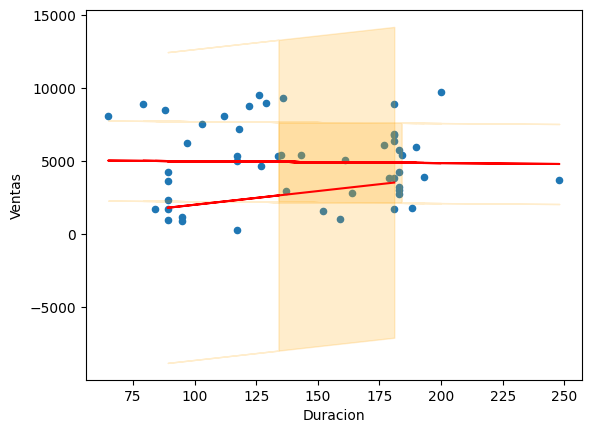

|      | Titulo                     | Estreno    |   Duracion |   Ventas | Genero     |
|------+----------------------------+------------+------------+----------+------------|
| 2501 | Wild Wild West             | 2/28/2021  |        184 |     5417 | Western    |
| 2502 | Wildest Dream              | 9/20/2019  |        118 |     7197 | Documental |
| 2503 | Will                       | 6/14/2019  |        117 |     5385 | Fantasia   |
| 2504 | Willow Creek               | 6/20/2023  |        103 |     7548 | Terror     |
| 2505 | Winds of the Wasteland     | 12/08/2020 |        181 |     6388 | Western    |
| 2506 | Wings                      | 03/08/2020 |        248 |     3691 | Guerra     |
| 2507 | Winter's Tale              | 11/26/2018 |        188 |     1816 | Fantasia   |
| 2508 | Wisconsin Death Trip       | 11/19/2021 |        137 |     2960 | Documental |
| 2509 | Wish                       | 05/11/2023 |        183 |     2729 | Comedia    |
| 2510 | Wish You Were Here     

In [37]:
df.plot(x=x, y=y, kind='scatter')
a = linear_regression(df, x, y)
plt_lr(df=df, x=x, y=y, colors=('blue', 'green'), **a)
a = linear_regression(df.tail(5), x, y)
plt_lr(df=df.tail(5), x=x, y=y, colors=('blue', 'green'), **a)

plt.show()
print_tabulate(df)